In [1]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
csv_path1 = "../Player Tweets/Fred Davis_Trans 1.csv"
csv_path2 = "../Player Tweets/Fred Davis_Trans 2.csv"
csv_path3 = "../Player Tweets/Fred Davis_Trans 3.csv"

#Establish pd dataframe for each file
freddavis1 = pd.read_csv(csv_path1, sep=";")
freddavis2 = pd.read_csv(csv_path2, sep=";")
freddavis3 = pd.read_csv(csv_path3, sep=";", error_bad_lines=False)

#concatenate data frames 
freddavis_master = pd.concat([freddavis1, freddavis2, freddavis3])
freddavis_master

b'Skipping line 763: expected 10 fields, saw 11\n'


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2008-05-02 15:48,0,0,Watching Scoble interview one of my clients in...,NaN,NaN,NaN,802167991,https://twitter.com/freddavis/status/802167991
1,NaN,2008-05-02 14:36,0,0,Fred Davis twittering under the table,NaN,NaN,NaN,802122493,https://twitter.com/RocmanUSA/status/802122493
2,NaN,2008-05-02 14:34,0,0,Lunch with @ scobleizer in Petaluma,NaN,@,NaN,802121105,https://twitter.com/freddavis/status/802121105
3,NaN,2008-05-02 13:52,0,0,@ davewiner Happy Birthday Dave!,NaN,@,NaN,802093712,https://twitter.com/freddavis/status/802093712
4,NaN,2008-05-01 21:45,0,0,talk about pressing the flesh! Its shoulder2sh...,NaN,NaN,NaN,801613889,https://twitter.com/freddavis/status/801613889
5,NaN,2008-05-01 21:44,0,0,venture beat party... Mobbed!,NaN,NaN,NaN,801613389,https://twitter.com/freddavis/status/801613389
6,NaN,2008-05-01 21:09,0,0,Driving across golden gate... Beautiful light!,NaN,NaN,NaN,801600244,https://twitter.com/freddavis/status/801600244
7,NaN,2008-05-01 18:06,0,0,<yawn> not enough sleep... time for Pomegranat...,NaN,NaN,NaN,801535485,https://twitter.com/freddavis/status/801535485
8,NaN,2008-05-01 16:48,0,0,@ Scobleizer What next? A sock puppet? ;-),NaN,@,NaN,801489783,https://twitter.com/freddavis/status/801489783
9,NaN,2008-05-01 10:58,0,0,Fred Davis is a career volunteer at five area ...,NaN,NaN,NaN,801266103,https://twitter.com/michigannews/status/801266103


In [2]:
#fillna's with text to fix error
freddavis_master["text"].fillna("text", inplace=True)
freddavis_master.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2008-05-02 15:48,0,0,Watching Scoble interview one of my clients in...,NaN,NaN,NaN,802167991,https://twitter.com/freddavis/status/802167991
1,NaN,2008-05-02 14:36,0,0,Fred Davis twittering under the table,NaN,NaN,NaN,802122493,https://twitter.com/RocmanUSA/status/802122493
2,NaN,2008-05-02 14:34,0,0,Lunch with @ scobleizer in Petaluma,NaN,@,NaN,802121105,https://twitter.com/freddavis/status/802121105
3,NaN,2008-05-02 13:52,0,0,@ davewiner Happy Birthday Dave!,NaN,@,NaN,802093712,https://twitter.com/freddavis/status/802093712
4,NaN,2008-05-01 21:45,0,0,talk about pressing the flesh! Its shoulder2sh...,NaN,NaN,NaN,801613889,https://twitter.com/freddavis/status/801613889


In [3]:
#create list of sentiment scores associated with tweets about relevant player

freddavis_sent = []

tweets = freddavis_master["text"]

for index,tweet in freddavis_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    freddavis_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
freddavis_sent



[{'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2008-05-02 15:48'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2008-05-02 14:36'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2008-05-02 14:34'},
 {'Compound': 0.6114,
  'Negative': 0.429,
  'Neutral': 0.0,
  'Positive': 0.571,
  'date': '2008-05-02 13:52'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2008-05-01 21:45'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2008-05-01 21:44'},
 {'Compound': 0.636,
  'Negative': 0.544,
  'Neutral': 0.0,
  'Positive': 0.456,
  'date': '2008-05-01 21:09'},
 {'Compound': 0.5739,
  'Negative': 0.772,
  'Neutral': 0.0,
  'Positive': 0.228,
  'date': '2008-05-01 18:06'},
 {'Compound': 0.3313,
  'Negative': 0.679,
  'Neutral': 0.0,
  'Positive': 0.321,
  'date': '2008-05-01 16:48'},
 {'Compound': 0.0,


In [4]:
# Convert player sentiments to DataFrame
FD_pd = pd.DataFrame.from_dict(freddavis_sent)
FD_pd.head()

,Compound,Negative,Neutral,Positive,date
0,0.0000,1.000,0.0,0.000,2008-05-02 15:48
1,0.0000,1.000,0.0,0.000,2008-05-02 14:36
2,0.0000,1.000,0.0,0.000,2008-05-02 14:34
3,0.6114,0.429,0.0,0.571,2008-05-02 13:52
4,0.0000,1.000,0.0,0.000,2008-05-01 21:45


In [5]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(freddavis_master, FD_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2008-05-02 15:48,0,0,Watching Scoble interview one of my clients in...,NaN,NaN,NaN,802167991,https://twitter.com/freddavis/status/802167991,0.0000,1.000,0.0,0.000
1,NaN,2008-05-02 14:36,0,0,Fred Davis twittering under the table,NaN,NaN,NaN,802122493,https://twitter.com/RocmanUSA/status/802122493,0.0000,1.000,0.0,0.000
2,NaN,2008-05-02 14:34,0,0,Lunch with @ scobleizer in Petaluma,NaN,@,NaN,802121105,https://twitter.com/freddavis/status/802121105,0.0000,1.000,0.0,0.000
3,NaN,2008-05-02 13:52,0,0,@ davewiner Happy Birthday Dave!,NaN,@,NaN,802093712,https://twitter.com/freddavis/status/802093712,0.6114,0.429,0.0,0.571
4,NaN,2008-05-01 21:45,0,0,talk about pressing the flesh! Its shoulder2sh...,NaN,NaN,NaN,801613889,https://twitter.com/freddavis/status/801613889,0.0000,1.000,0.0,0.000


In [6]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2008-05-02 15:48,0,0,Watching Scoble interview one of my clients in...,NaN,NaN,NaN,802167991,https://twitter.com/freddavis/status/802167991,0.0000,1.000,0.0,0.000,2008-05-02
1,NaN,2008-05-02 14:36,0,0,Fred Davis twittering under the table,NaN,NaN,NaN,802122493,https://twitter.com/RocmanUSA/status/802122493,0.0000,1.000,0.0,0.000,2008-05-02
2,NaN,2008-05-02 14:34,0,0,Lunch with @ scobleizer in Petaluma,NaN,@,NaN,802121105,https://twitter.com/freddavis/status/802121105,0.0000,1.000,0.0,0.000,2008-05-02
3,NaN,2008-05-02 13:52,0,0,@ davewiner Happy Birthday Dave!,NaN,@,NaN,802093712,https://twitter.com/freddavis/status/802093712,0.6114,0.429,0.0,0.571,2008-05-02
4,NaN,2008-05-01 21:45,0,0,talk about pressing the flesh! Its shoulder2sh...,NaN,NaN,NaN,801613889,https://twitter.com/freddavis/status/801613889,0.0000,1.000,0.0,0.000,2008-05-01


In [7]:
merged["date_string"] = merged["date_new"].dt.strftime('%Y-%m-%d')
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new,date_string
0,NaN,2008-05-02 15:48,0,0,Watching Scoble interview one of my clients in...,NaN,NaN,NaN,802167991,https://twitter.com/freddavis/status/802167991,0.0000,1.000,0.0,0.000,2008-05-02,2008-05-02
1,NaN,2008-05-02 14:36,0,0,Fred Davis twittering under the table,NaN,NaN,NaN,802122493,https://twitter.com/RocmanUSA/status/802122493,0.0000,1.000,0.0,0.000,2008-05-02,2008-05-02
2,NaN,2008-05-02 14:34,0,0,Lunch with @ scobleizer in Petaluma,NaN,@,NaN,802121105,https://twitter.com/freddavis/status/802121105,0.0000,1.000,0.0,0.000,2008-05-02,2008-05-02
3,NaN,2008-05-02 13:52,0,0,@ davewiner Happy Birthday Dave!,NaN,@,NaN,802093712,https://twitter.com/freddavis/status/802093712,0.6114,0.429,0.0,0.571,2008-05-02,2008-05-02
4,NaN,2008-05-01 21:45,0,0,talk about pressing the flesh! Its shoulder2sh...,NaN,NaN,NaN,801613889,https://twitter.com/freddavis/status/801613889,0.0000,1.000,0.0,0.000,2008-05-01,2008-05-01


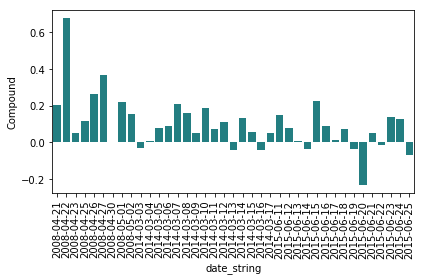

In [8]:
#plot groupby *x axis = day, y axis = compound sentiment score*
grouped = merged.groupby('date_string').mean().reset_index()
grouped.sort_values("date_string", ascending = True, inplace = True)
grouped.head()
sns.barplot(x = grouped["date_string"], y = grouped["Compound"], color = "#138D91")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('freddavis.png')
plt.show()